In [58]:
from google.colab import drive 
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [59]:
import numpy as np
import matplotlib.pyplot as plt
import os 
import cv2


In [60]:
DATADIR ='/content/drive/MyDrive/flowers'
CATAGORIES = ['daisy' , 'dandelion' , 'rose' , 'sunflower' , 'tulip'] 



In [61]:
training_data = []
IMAGE_SIZE = 150
def create_training_data():
  for category in CATAGORIES:
    path  = os.path.join(DATADIR , category) # path to daisy , dandeltion , rose , sunflower , tulip
    class_num = CATAGORIES.index(category)

    for img in  os.listdir(path):
      try :
        img_array = cv2.imread(os.path.join(path , img) , cv2.IMREAD_GRAYSCALE)
        new_array = cv2.resize(img_array , (IMAGE_SIZE , IMAGE_SIZE))
        training_data.append([new_array , class_num])
      except Exception as e:
        pass
create_training_data()

In [62]:
print(training_data[0])

[array([[129, 124, 114, ..., 170, 166, 149],
       [124, 108,  96, ..., 135, 151, 136],
       [109,  96,  82, ..., 129, 125, 124],
       ...,
       [ 20,  20,  19, ...,  39,  36,  38],
       [ 19,  18,  19, ...,  38,  40,  40],
       [ 17,  16,  19, ...,  38,  39,  37]], dtype=uint8), 0]


In [63]:
import random 

random.shuffle(training_data)

In [64]:
for sample in training_data[0:10]:
  print(sample[1])

2
1
4
4
1
3
1
0
2
2


In [65]:
input = []
targets = []

In [66]:
for features , labels in training_data:
  input.append(features)
  targets.append(labels)

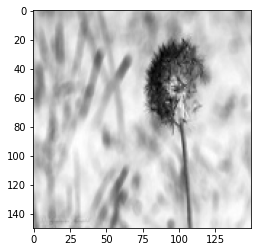

In [67]:
digit = input[4]
import matplotlib.pyplot as plt
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

In [68]:
input = np.array(input)
input.shape

(4323, 150, 150)

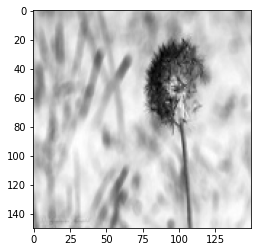

In [69]:
digit = input[4]
import matplotlib.pyplot as plt
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

In [70]:
input = input.reshape(4323, 150*150)

In [71]:
input[0]

array([ 55,  58,  49, ..., 184, 162,  14], dtype=uint8)

In [72]:
input.shape

(4323, 22500)

In [73]:
input = input.astype('float32')/255

In [74]:
input[0]

array([0.21568628, 0.22745098, 0.19215687, ..., 0.72156864, 0.63529414,
       0.05490196], dtype=float32)

In [75]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
targets = le.fit_transform(targets)

In [76]:
print(targets)

[2 1 4 ... 4 2 4]


In [77]:
from keras.utils import to_categorical

targets=to_categorical(targets,5)

In [78]:
targets

array([[0., 0., 1., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       ...,
       [0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1.]], dtype=float32)

In [79]:
from sklearn.model_selection import train_test_split



In [80]:
train_data,test_data,train_targets,test_targets=train_test_split(input,targets,test_size=0.25,random_state=42)

In [81]:
train_data

array([[0.45490196, 0.42352942, 0.34509805, ..., 0.        , 0.00392157,
        0.00392157],
       [0.52156866, 0.53333336, 0.5372549 , ..., 0.21960784, 0.21568628,
        0.21960784],
       [0.29803923, 0.28235295, 0.27450982, ..., 0.21568628, 0.1764706 ,
        0.11764706],
       ...,
       [0.61960787, 0.6509804 , 0.70980394, ..., 0.14901961, 0.15294118,
        0.15686275],
       [0.09019608, 0.10196079, 0.10196079, ..., 0.34117648, 0.27058825,
        0.15686275],
       [0.47058824, 0.4117647 , 0.3647059 , ..., 0.28627452, 0.25882354,
        0.23529412]], dtype=float32)

In [82]:
test_data.shape

(1081, 22500)

In [83]:
train_targets[0]

array([0., 0., 1., 0., 0.], dtype=float32)

In [84]:
test_targets

array([[0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0.],
       ...,
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       [1., 0., 0., 0., 0.]], dtype=float32)

In [85]:
from keras import models
from keras import layers
network = models.Sequential()
network.add(layers.Dense(512, activation='relu', input_shape=(22500,)))
network.add(layers.Dense(5, activation='softmax'))

In [86]:

network.compile( optimizer='rmsprop',
loss='categorical_crossentropy', 
metrics=['accuracy'])

In [87]:
network.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 512)               11520512  
_________________________________________________________________
dense_7 (Dense)              (None, 5)                 2565      
Total params: 11,523,077
Trainable params: 11,523,077
Non-trainable params: 0
_________________________________________________________________


In [88]:
history = network.fit(train_data,train_targets, epochs=100,batch_size= 32)

Epoch 1/100
102/102 [==============================] - 1s 8ms/step - loss: 35.6276 - accuracy: 0.2202
Epoch 2/100
102/102 [==============================] - 1s 7ms/step - loss: 11.9089 - accuracy: 0.2358
Epoch 3/100
102/102 [==============================] - 1s 7ms/step - loss: 8.2226 - accuracy: 0.2516
Epoch 4/100
102/102 [==============================] - 1s 8ms/step - loss: 5.6248 - accuracy: 0.2637
Epoch 5/100
102/102 [==============================] - 1s 7ms/step - loss: 3.9464 - accuracy: 0.2713
Epoch 6/100
102/102 [==============================] - 1s 7ms/step - loss: 2.8973 - accuracy: 0.2611
Epoch 7/100
102/102 [==============================] - 1s 8ms/step - loss: 2.2816 - accuracy: 0.2978
Epoch 8/100
102/102 [==============================] - 1s 7ms/step - loss: 2.0581 - accuracy: 0.2825
Epoch 9/100
102/102 [==============================] - 1s 7ms/step - loss: 2.0681 - accuracy: 0.2887
Epoch 10/100
102/102 [==============================] - 1s 8ms/step - loss: 1.8301 - accu

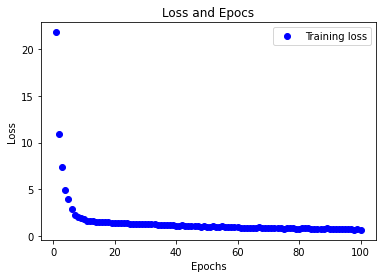

In [92]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict['loss']
epochs = range(1,len(loss_values)+1)
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.title('Loss and Epocs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

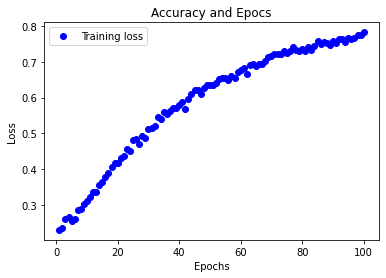

In [93]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict['accuracy']
epochs = range(1,len(loss_values)+1)
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.title('Accuracy and Epocs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [89]:
test_loss, test_acc = network.evaluate(test_data, test_targets)

34/34 [==============================] - 0s 3ms/step - loss: 4.1242 - accuracy: 0.2794
